In [ ]:
#1,Using the dataset faithful.csv create a model which shows the relationship between
#eruptions and waiting. Using cluster analysis find a cluster with highest value for
#waiting and eruption:

In [11]:
#importing libraies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
data=pd.read_csv("D:/SEM 4/faithful.csv")

In [13]:
data.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79.0
1,2,1.800,54.0
2,3,3.333,74.0
3,4,2.283,62.0
4,5,4.533,85.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   eruptions   268 non-null    float64
 2   waiting     269 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.5 KB


In [15]:
data.isnull().sum()

Unnamed: 0    0
eruptions     4
waiting       3
dtype: int64

In [16]:
#replaceing null values:
data['eruptions'].fillna(data['eruptions'].mean(),inplace=True)
data['waiting'].fillna(data['waiting'].mean(),inplace=True)

In [17]:
#taking feature values:
x=data.iloc[:,[1,2]].values

In [18]:
x

array([[ 3.6       , 79.        ],
       [ 1.8       , 54.        ],
       [ 3.333     , 74.        ],
       [ 2.283     , 62.        ],
       [ 4.533     , 85.        ],
       [ 2.883     , 55.        ],
       [ 4.7       , 88.        ],
       [ 3.6       , 85.        ],
       [ 1.95      , 51.        ],
       [ 4.35      , 85.        ],
       [ 1.833     , 54.        ],
       [ 3.917     , 84.        ],
       [ 4.2       , 78.        ],
       [ 1.75      , 47.        ],
       [ 4.7       , 83.        ],
       [ 2.167     , 52.        ],
       [ 1.75      , 62.        ],
       [ 4.8       , 84.        ],
       [ 1.6       , 52.        ],
       [ 3.48268657, 79.        ],
       [ 1.8       , 51.        ],
       [ 1.75      , 47.        ],
       [ 3.45      , 78.        ],
       [ 3.067     , 69.        ],
       [ 4.533     , 74.        ],
       [ 3.6       , 83.        ],
       [ 1.967     , 55.        ],
       [ 4.083     , 76.        ],
       [ 3.85      ,

In [19]:
#creating a list:
list_k=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    print(kmeans.inertia_)
    list_k.append(kmeans.inertia_)

49182.32608482408
8958.473331834117
5103.713038802657
2968.8902610901905
2040.1218074944338
1506.4622960663676
1028.2332598286482
797.7307414816014
647.7266022851633


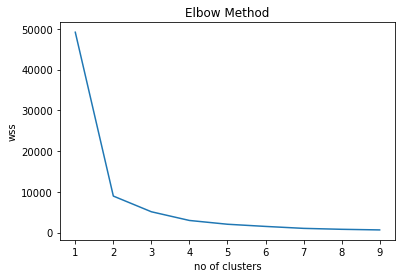

In [20]:
#ploting the k values:
plt.plot(range(1,10),list_k)
plt.title('Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wss')
plt.show()

In [21]:
#traning the model with clusters on dataset:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=32)

In [22]:
#predicting the clusters:
predict=kmeans.fit_predict(x)

In [23]:
predict

array([1, 0, 4, 2, 3, 0, 3, 3, 0, 3, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 4, 4, 1, 0, 4, 1, 1, 4, 4, 2, 1, 4, 0, 0, 1, 2, 3, 1, 2, 1, 2,
       4, 1, 2, 0, 1, 2, 4, 3, 0, 1, 0, 1, 4, 2, 4, 1, 2, 1, 0, 1, 2, 3,
       1, 1, 2, 4, 1, 0, 1, 4, 2, 4, 2, 1, 4, 1, 4, 1, 4, 2, 4, 3, 4, 1,
       0, 3, 2, 3, 0, 1, 2, 4, 1, 4, 0, 1, 2, 3, 0, 1, 1, 0, 1, 0, 3, 1,
       4, 2, 3, 1, 2, 1, 0, 3, 2, 3, 0, 4, 4, 0, 3, 1, 0, 1, 0, 3, 0, 1,
       0, 3, 4, 1, 0, 3, 0, 1, 1, 2, 1, 4, 4, 2, 1, 0, 3, 0, 4, 4, 2, 1,
       4, 4, 1, 3, 0, 3, 0, 3, 2, 1, 2, 4, 2, 3, 0, 3, 0, 2, 4, 4, 1, 1,
       4, 0, 3, 4, 0, 4, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 4, 1, 4, 1, 3, 4,
       0, 1, 2, 1, 3, 0, 1, 0, 4, 1, 0, 1, 4, 1, 0, 4, 2, 4, 0, 3, 0, 4,
       0, 1, 0, 4, 1, 1, 1, 1, 4, 1, 4, 0, 3, 0, 3, 0, 0, 4, 1, 2, 4, 0,
       3, 2, 3, 1, 2, 1, 2, 4, 0, 1, 4, 4, 3, 1, 4, 1, 0, 1, 1, 1, 2, 1,
       0, 2, 4, 1, 4, 3, 0, 4])

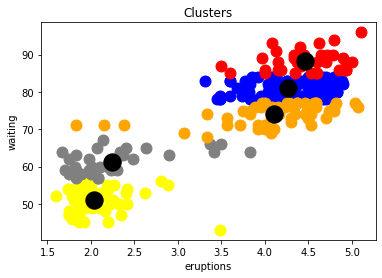

In [25]:
#visulazing the cluster:
plt.scatter(x[predict==0,0],x[predict==0,1],s=120,c='yellow',label='cluster 1')
plt.scatter(x[predict==1,0],x[predict==1,1],s=120,c='blue',label='cluster 2')
plt.scatter(x[predict==2,0],x[predict==2,1],s=120,c='grey',label='cluster 3')
plt.scatter(x[predict==3,0],x[predict==3,1],s=120,c='red',label='cluster 4')
plt.scatter(x[predict==4,0],x[predict==4,1],s=120,c='orange',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black')
plt.title('Clusters')
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.show()

In [ ]:
#find a cluster with highest value for waiting and eruption:
#Ans:Cluster 4 has highest value for waiting and eruption